In [1]:
import scipy.linalg
import scipy.optimize
import sys
import numpy as np
import math
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# Read markers file of grand axe and show them
tfu = importlib.reload(tfu)
ttfu = importlib.reload(ttfu)

file_name = './data/total_station/20220719_prisms_calib/theodolite_reference_prisms.txt'

_, _, _, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = ttfu.read_marker_file_raw_data(file_name)
print(trimble_1)

[[-7.97976774e+00  1.40497440e+00  1.29018631e+01  2.36302576e+01
   9.31627565e-01 -5.12716068e+00 -1.78220041e+01 -2.27098740e+01
  -1.14067152e+01 -7.69699103e+00 -1.57296797e+00  2.24325857e+01]
 [ 3.84956081e+00  9.80184623e+00  1.43715520e+01 -2.38486616e+00
  -8.54138999e+00 -1.69646821e+01 -1.07312793e+01  1.19478195e-01
   4.25944715e+00  1.36437316e+01  2.55839523e+01  2.61286612e+01]
 [ 4.68361615e-02  2.12530189e-02  1.07444501e-02  9.41288003e-03
   5.12635689e-02  4.83175394e-02  3.77859337e-02  2.30809808e-02
   6.16883444e-02  1.65474618e-02  4.42497043e-02 -8.17430569e-02]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]]


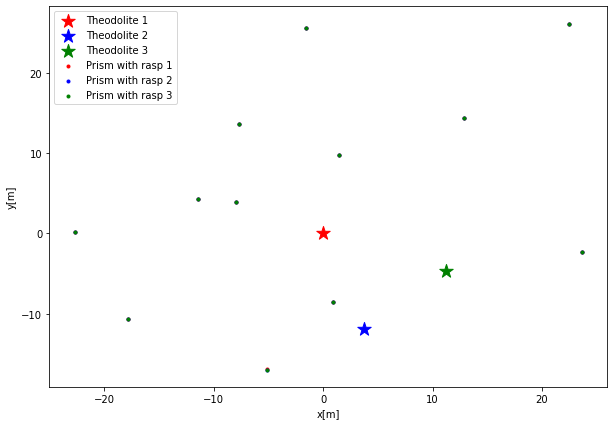

In [3]:
tfu.plot_trajectories_prism(3, trimble_1, T_2_grand@trimble_2, T_3_grand@trimble_3, T_1_grand, T_2_grand, T_3_grand, 0, 0,"example.pdf",0)

In [4]:
file = "./data/HQ_bag/hq_11h10_second_follow_good_2022-07-19-11-11-35_filtered.bag"
Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file, Tf)


Number of data for theodolites: [355 472 377]
Bad measures: 1383


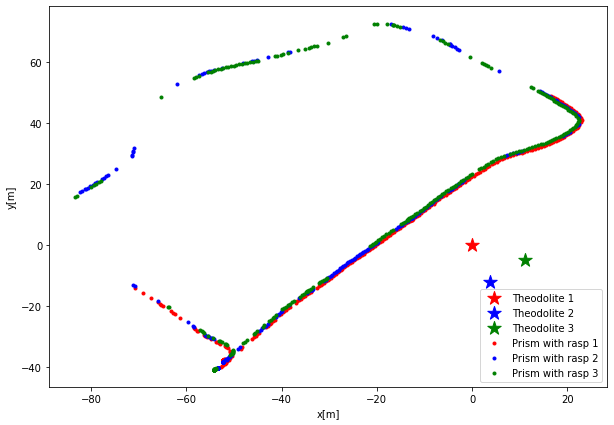

In [5]:
trimble_1_exp = np.array(trajectory_trimble_1).T
trimble_2_exp = np.array(trajectory_trimble_2).T
trimble_3_exp = np.array(trajectory_trimble_3).T
tfu.plot_trajectories_prism(3, trimble_1_exp, trimble_2_exp, trimble_3_exp, T_1_grand, T_2_grand, T_3_grand, 0, 1, "./figs/Hq_traj_quick.pdf", 0)